In [4]:
!pip install -q transformers datasets kaggle convokit && pip install -q --upgrade openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

In [4]:
!mkdir -p data/enron_csv
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and extract the Enron dataset
!kaggle datasets download -d wcukierski/enron-email-dataset
!unzip enron-email-dataset.zip -d data/enron_csv

Dataset URL: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset
License(s): copyright-authors
Archive:  enron-email-dataset.zip
  inflating: data/enron_csv/emails.csv  


In [5]:
FEW_SHOT_EXAMPLES = [
    (
        #Raw Input
        r"""
        Message-ID: <21013688.1075844564560.JavaMail.evans@thyme> Date: Tue, 29 Aug 2000 01:26:00 -0700 (PDT) From: sara.shackleton@enron.com To: william.bradford@enron.com Subject: Re: Credit Derivatives Mime-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Transfer-Encoding: 7bit X-From: Sara Shackleton X-To: William S Bradford X-cc: X-bcc: X-Folder: \Sara_Shackleton_Dec2000_June2001_1\Notes Folders\Sent X-Origin: SHACKLETON-S X-FileName: sshackle.nsf Bill: Thanks for the info. I also spoke with Jeff about how EnronCredit.com Ltd. was going to work since Dennis O'Connell (London lawyer) is responsible for that group. Maybe you will be able to clarify which of Jeff's "positions" will be hedges and which will be backed to EnronCredit. Maybe Rod will be handling most of Jeff's credit. I'd appreciate an update. Sara William S Bradford 08/29/2000 07:24 AM To: Sara Shackleton/HOU/ECT@ECT cc: Mark Taylor/HOU/ECT@ECT, Paul Radous/Corp/Enron@ENRON, Rod Nelson/LON/ECT@ECT Subject: Re: Credit Derivatives Sara, Please contact either Paul Radous or me on credit derivatives in the U.S. Rod Nelson is the lead credit support for EnronCredit.com and should also be available in London, if necessary. I am not aware of these recent trades but I am having lunch with Jeff Kinneman on Thursday to discuss among other things Credit support for his business. It does concern me that we would offer to provide collateral DLJ without Treasury's approval. Bill From: Sara Shackleton on 08/28/2000 06:53 PM To: William S Bradford/HOU/ECT@ECT cc: Mark Taylor/HOU/ECT@ECT Subject: Credit Derivatives I am seeing more and more credit derivatives. The trades originating in Houston are coming from Jeff Kinneman's bond/debt traders but are booked in the name of ECT Investments, Inc. or ENA. I can't be certain if these are backed to EnronCredit.com Limited. In particular, there is a proposed total return bond trade with DLJ International Capital requiring ECT Investments to post collateral. We have no master with this party. Who in Houston credit is looking at credit derivatives? FYI, other credit deals seem to be transacted wtih Deutsche Bank and UBS AG.
        """,
        #Desired JSON
        {
            "reply": """
                      Bill: Thanks for the info. I also spoke with Jeff about how EnronCredit.com Ltd. was going to work since Dennis O'Connell (London lawyer) is responsible for that group. Maybe you will be able to clarify which of Jeff's "positions" will be hedges and which will be backed to EnronCredit. Maybe Rod will be handling most of Jeff's credit. I'd appreciate an update. Sara
                      """,
            "prompt": """
                     Sara, Please contact either Paul Radous or me on credit derivatives in the U.S. Rod Nelson is the lead credit support for EnronCredit.com and should also be available in London, if necessary. I am not aware of these recent trades but I am having lunch with Jeff Kinneman on Thursday to discuss among other things Credit support for his business. It does concern me that we would offer to provide collateral DLJ without Treasury's approval. Bill
                     """,
        }
    ),
    (
        #Raw Input
        r"""
        Message-ID: <22688499.1075854130303.JavaMail.evans@thyme> Date: Mon, 24 Apr 2000 05:43:00 -0700 (PDT) From: pat.clynes@enron.com To: aimee.lannou@enron.com Subject: Meter #1591 Lamay Gaslift Cc: daren.farmer@enron.com Mime-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Transfer-Encoding: 7bit Bcc: daren.farmer@enron.com X-From: Pat Clynes X-To: Aimee Lannou X-cc: Daren J Farmer X-bcc: X-Folder: \Darren_Farmer_Dec2000\Notes Folders\Logistics X-Origin: Farmer-D X-FileName: dfarmer.nsf Aimee, Please check meter #1591 Lamay gas lift. It doesn't appear to have very much flow and the BAV is showing the nom volume. This could be adversely affecting the risk numbers. Pat
        """,
        #Desired JSON
        {
            "reply": """
                     Aimee, Please check meter #1591 Lamay gas lift. It doesn't appear to have very much flow and the BAV is showing the nom volume. This could be adversely affecting the risk numbers. Pat
                     """,
            "prompt": """
                      """,
        }
    ),
    (
        #Raw Input
        r"""
        Message-ID: <27817771.1075841359502.JavaMail.evans@thyme> Date: Thu, 2 May 2002 04:54:27 -0700 (PDT) From: knipe3@msn.com To: fenner.chet@enron.com, joe.parks@enron.com, constantine.brian@enron.com, wollam.erik@enron.com, corrier.brad@enron.com Subject: Re: man night again? Mime-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Transfer-Encoding: 7bit X-From: chad knipe <knipe3@msn.com> X-To: Chet Fenner <chet_fenner@bmc.com>, Parks, Joe </O=ENRON/OU=NA/CN=RECIPIENTS/CN=JPARKS>, Brian Constantine <brianc@saltgrass.com>, EriK Wollam <erwollam@hotmail.com>, Brad Corrier <bcorrier@cox-internet.com>, c.r.zander@att.net, lawfeder@msn.com X-cc: X-bcc: X-Folder: \ExMerge - Parks, Joe\Deleted Items X-Origin: PARKS-J X-FileName: joe parks 6-26-02.pst GCCA Crawfish and rip-off raffle & over-priced print extravaganza tonight at approx 6-6:30pm. Pig and I and ?? and ?? will be there to be overserved and underfed. I've got my checkbook and wobbly boot ready to go!! C. ----- Original Message ----- From: Fenner, Chet Sent: Thursday, May 02, 2002 9:18 AM To: 'Parks, Joe'; Fenner, Chet; chad knipe; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; lawfeder@msn.com Subject: RE: man night again? Nothin'. -----Original Message----- From: Parks, Joe [mailto:Joe.Parks@bridgeline.net] Sent: Thursday, May 02, 2002 7:59 AM To: Fenner, Chet; chad knipe; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; lawfeder@msn.com Subject: RE: man night again? what are you guys talking about? -----Original Message----- From: Fenner, Chet [mailto:Chet_Fenner@bmc.com] Sent: Thursday, May 02, 2002 6:43 AM To: 'chad knipe'; Fenner, Chet; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; Parks, Joe; lawfeder@msn.com Subject: RE: man night again? Screw it, I'm going to Tony's. -----Original Message----- From: chad knipe [mailto:knipe3@msn.com] Sent: Wednesday, May 01, 2002 6:55 PM To: Chet Fenner; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: Re: man night again? what ----- Original Message ----- From: Fenner, Chet Sent: Wednesday, May 01, 2002 3:01 PM To: 'chad knipe'; Fenner, Chet; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: RE: man night again? I feel like Erik. No one will answer my question. -----Original Message----- From: chad knipe [mailto:knipe3@msn.com] Sent: Wednesday, May 01, 2002 2:49 PM To: Chet Fenner; Brian Constantine; EriK Wollam; Brad Corrier; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: Re: man night again? sh"IN" - dig.......get it? aaaaaaaaaaaaaaaahhhhhhhhhhhhhaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhh ----- Original Message ----- From: Fenner, Chet Sent: Wednesday, May 01, 2002 5:11 PM To: 'chad knipe'; Brian Constantine; EriK Wollam; Brad Corrier; Fenner, Chet; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: RE: man night again? Where is this shin-dig? -----Original Message----- From: chad knipe [mailto:knipe3@msn.com] Sent: Tuesday, April 30, 2002 6:23 AM To: Brian Constantine; EriK Wollam; Brad Corrier; Chet Fenner; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: Re: man night again? in. ----- Original Message ----- From: Brian Constantine Sent: Tuesday, April 30, 2002 8:26 AM To: Erik Wollam; bcorrier@cox-internet.com; knipe3@msn.com; chet_fenner@bmc.com; c.r.zander@att.net; Joe.Parks@bridgeline.net; lawfeder@msn.com Subject: RE: man night again? I am IN!!! Would like to be there by 6:30 or so...maybe later. Zander is "out"...unless he brings Jake. Someone forward to Chambers...you know he's in. BC -----Original Message----- From: Erik Wollam [mailto:erwollam@hotmail.com] Sent: Thursday, April 25, 2002 5:25 PM To: bcorrier@cox-internet.com; knipe3@msn.com; chet_fenner@bmc.com; c.r.zander@att.net; Joe.Parks@bridgeline.net; Brian Constantine; lawfeder@msn.com Subject: man night again? Zero response from my last effort on this matter. Are your emails working men? Zander called and suggested we attend the CCA crawfish boil function to be held Thurday May 2, 2002. Reasonably priced event, beer, mud bugs and we can sit back and watch pig win raffle prizes. I'm in e. _________________________________________________________________ Send and receive Hotmail on your mobile device: http://mobile.msn.com ************************************************************************ This e-mail is the property of Bridgeline Holdings, L.P. and/or its relevant affiliate(s) and may contain confidential and privileged material for the sole use of the intended recipient(s). Any review, use, distribution or disclosure by others is strictly prohibited. If you are not the intended recipient (or authorized to receive for the recipient), please contact the sender and delete all copies of the message. This e-mail (and any attachments hereto) are not intended to be an offer (or an acceptance) and do not create or evidence a binding and enforceable contract between Bridgeline Holdings, L.P. (or any of its affiliates) and the intended recipient or any other party, and may not be relied on by anyone as the basis of a contract by estoppel or otherwise. Thank you. ************************************************************************	Nothin'.	GCCA Crawfish and rip-off raffle & over-priced print extravaganza tonight at approx 6-6:30pm. Pig and I and ?? and ?? will be there to be overserved and underfed. I've got my checkbook and wobbly boot ready to go!! C.
stokley-c/chris_stokley/iso/client_rep/41.	Message-ID: <10695160.1075858510449.JavaMail.evans@thyme> Date: Wed, 8 Aug 2001 14:35:08 -0700 (PDT) From: kalmeida@caiso.com To: chris.stokley@enron.com Subject: Enron 480, 1480 charges Mime-Version: 1.0 Content-Type: text/plain; charset=us-ascii Content-Transfer-Encoding: 7bit X-From: Almeida, Keoni <KAlmeida@caiso.com> X-To: Stokley, Chris </O=ENRON/OU=NA/CN=RECIPIENTS/CN=MSTOKLE> X-cc: X-bcc: X-Folder: \Stokley, Chris (Non-Privileged)\Chris Stokley\ISO\Client Rep X-Origin: Stokley-C X-FileName: Stokley, Chris (Non-Privileged).pst <<Keoni.zip>> Chris, per your request here are the 480 and 1480 charges that have been tracked to date for Enron. Please keep in mind that the systems have not been built to incorporate this data into our Settlements process so the normal validations built into our Settlements process are not applied to the manual tracking of these charges. Therefore, this data should not be considered Settlement quality. If these charges ever to become effective the proper systems will be built to pull in this data into the Settlement process. I checked with some folks and found out that FERC should rule on this during September. Take care. Keoni Almeida California Independent System Operator phone: 916/608-7053 pager: 916/814-7352 alpha page: 9169812000.1151268@pagenet.net e-mail: <mailto:kalmeida@caiso.com>
        """,
        #Desired JSON
        {
            "reply": """
                     GCCA Crawfish and rip-off raffle & over-priced print extravaganza tonight at approx 6-6:30pm. Pig and I and ?? and ?? will be there to be overserved and underfed. I've got my checkbook and wobbly boot ready to go!! C.
                     """,
            "prompt": """
                      Nothin'
                      """,
        }
    ),
]

In [6]:
!pip install backoff

In [20]:
import os, json, time, openai, pandas as pd
from tqdm.auto import tqdm
from openai import OpenAI, RateLimitError, APIError
from concurrent.futures import ThreadPoolExecutor, as_completed
import backoff

api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(api_key=api_key)

MODEL = "gpt-3.5-turbo"
MAX_TOKENS = 800

@backoff.on_exception(backoff.expo, RateLimitError, max_time=1000)
def parse_email_thread(raw_email: str, examples=FEW_SHOT_EXAMPLES) -> dict:
    time.sleep(1.5)
    system_msg = {
        "role": "system",
        "content": (
            "You are an email‐thread parser.  You will return a JSON with exactly two keys:\n"
            '  • "reply": the plaintext body of the most recent message\n'
            '  • "prompt": the plaintext body of the message immediately prior to the reply\n\n'
            "**Important**:\n"
            "Each field must be a string.  Do NOT include any other keys or text.  \n\n"
            "Strip **all** header or metadata lines.  That includes any line that:\n"
            "- Contains “Forwarded by” or “Original Message” separators\n"
            "- Starts with or contains “From:”, “To:”, “Cc:”, “Bcc:”, “Subject:”, “Date:”, “Message-ID:”, “Mime-Version:”, “Content-Type:”, or “X-”\n"
            "- Is just an email address (e.g. contains “@enron.com”)\n"
            "- Appears after standard signature markers (“Regards,” “Best,” “Thanks,” etc.)—drop everything from that marker onward\n"
            "- Is blank or contains only punctuation\n\n"
            "Collapse multiple blank lines into a single newline.  Do **not** include any of these stripped lines in your output.  If there is no prior message, set “prompt” to an empty string.  Return only the JSON, no explanation."
        )
    }
    messages = [system_msg]
    for raw_ex, json_ex in examples:
        messages.append({"role": "user",      "content": raw_ex})
        messages.append({"role": "assistant", "content": json.dumps(json_ex)})
    messages.append({"role": "user", "content": raw_email})

    content = None
    try:
        response = client.chat.completions.create(
            model=MODEL,
            messages=messages,
            temperature=0.0,
            top_p=1.0,
            n = 1,
        )

        content = response.choices[0].message.content.strip()
        start = content.find("{")
        end   = content.rfind("}")
        if start == -1 or end == -1:
            raise ValueError(f"No JSON object found in LLM output:\n{content!r}")
        clean = content[start:end+1]

        parsed = json.loads(clean)
        return {
            "prompt": parsed.get("prompt",""),
            "reply":  parsed.get("reply","")
        }
        parsed = json.loads(content)
        return {
              "prompt": parsed.get("prompt", ""),
              "reply":  parsed.get("reply",  "")
        }
    except (APIError, json.JSONDecodeError) as e:
        print(f"[{MODEL}] Error: {e!r}\nLLM output:\n{content}\n")
        raise

df = pd.read_csv("data/enron_csv/emails.csv")
df = df.sample(5000, random_state=42).reset_index(drop=True)

parsed_results = []

with ThreadPoolExecutor(max_workers=1) as exe:
    futures = {exe.submit(parse_email_thread, raw): idx
               for idx, raw in enumerate(df["message"])}
    for fut in tqdm(as_completed(futures), total=len(futures), desc="Parsing threads"):
        try:
            parsed_results.append(fut.result())
        except Exception:
           parsed_results.append({"prompt": None, "reply": None})

parsed_df = pd.DataFrame(parsed_results)
df = pd.concat([df, parsed_df], axis=1)
df.to_csv("email_pairs_extracted.csv", index=False)

Parsing threads:   0%|          | 0/5000 [00:00<?, ?it/s]

[gpt-3.5-turbo] Error: JSONDecodeError('Invalid control character at: line 1 column 502 (char 501)')
LLM output:
{"reply": "\n                     You're invited to join community and national experts as they discuss your most pressing concerns about September 11th and the ongoing issues we face as a nation.\n\nOperation Hope: Reclaiming Our Future \nOne Step at a Time\n\nA cooperative community effort to provide a free evening of information, for the entire family (ages 5 and up)\n\nAn evening of hope and healing and a blueprint on how to adapt to these challenging times!\n\nSponsored by Enron \n\t \nDate:		Thursday, October 25, 2001\nTime: 		Registration from 6:15 PM - 6:50 PM\n          		Program from 7:00 PM - 9:00 PM\nPlace: 	 	JW Marriott across from the Galleria on Westheimer\n\n\t\nAdmission is free, but by RSVP only because of limited space\n\nTo RSVP and for more information, please call 713-303-3966\nOr Log On to\nwww.enronoperationhope.com\n                     ", "prompt":

In [1]:
df = pd.read_csv("email_pairs_extracted.csv")

df['prompt'] = df['prompt'].str.strip()
df['reply']  = df['reply'].str.strip()
df = df.loc[:, ['prompt', 'reply']]
df = df.loc[df['prompt'] != 'N/A']
df = df.loc[df['reply'] != 'N/A']
df = df.dropna()
df = df.loc[df['prompt'] != df['reply']]

df = df.loc[
    df['prompt'].str.split().str.len().ge(5) &
    df['reply'].str.split().str.len().ge(5)
]

In [2]:
df.head()

,prompt,reply
0,"Sara,\n\nPlease contact either Paul Radous or ...",Bill: Thanks for the info. I also spoke wit...
8,Hey Philip!\n\nWhat's up? I have mixed feeling...,got your message last night. What is up? Bet...
18,My thoughts for the trip:\n\nFriday:\n\nEveryo...,that sounds fine - but the zoo is in balboa pa...
19,Attached below please find the cash flow/tarif...,Attached is the latest summary (hard coded num...
20,"Sheila,\n\nSome minor differences between the ...","Vince, if there are some differences that we n..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   prompt  1371 non-null   object
 1   reply   1371 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB


In [5]:
from convokit import Corpus, Utterance, Speaker, PolitenessStrategies, TextParser

df = df.reset_index(drop=True)
utterances = []
speakers = {}

for i, row in df.iterrows():
    speaker_id = f"user_{i}"
    speakers[speaker_id] = Speaker(id=speaker_id)
    utterances.append(Utterance(id=str(i), speaker=speakers[speaker_id], text=row["reply"]))

# Build ConvoKit Corpus and extract politeness strategies
corpus = Corpus(utterances=utterances)
parser = TextParser()
corpus = parser.transform(corpus)
polite = PolitenessStrategies()
corpus = polite.transform(corpus)

# Build politeness feature df
feat_df = pd.DataFrame([
    corpus.get_utterance(str(i)).meta["politeness_strategies"]
    for i in range(len(df))
]).fillna(0)

# Define actual features for ConvoKit
positive_feats = [
    'feature_politeness_==Please==',
    'feature_politeness_==Please_start==',
    'feature_politeness_==HASHEDGE==',
    'feature_politeness_==Indirect_(btw)==',
    'feature_politeness_==Hedges==',
    'feature_politeness_==Deference==',
    'feature_politeness_==Gratitude==',
    'feature_politeness_==Apologizing==',
    'feature_politeness_==Indirect_(greeting)==',
    'feature_politeness_==SUBJUNCTIVE=='
]

negative_feats = [
    'feature_politeness_==Direct_start==',
    'feature_politeness_==Direct_question==',
    'feature_politeness_==Factuality==',
    'feature_politeness_==HASNEGATIVE==',
    'feature_politeness_==INDICATIVE=='
]

# Compute raw politeness score and normalize to [0, 1]
df["politeness_score_CK"] = (
    feat_df[positive_feats].sum(axis=1)
    - feat_df[negative_feats].sum(axis=1)
)

min_score = df["politeness_score_CK"].min()
max_score = df["politeness_score_CK"].max()
df["politeness_score_CK"] = ((df["politeness_score_CK"] - min_score) / (max_score - min_score)).round(3)

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem


In [6]:
import torch
from transformers import pipeline

HF_MODEL_NAME = "gljj/politeness-model"
device_id = 0 if torch.cuda.is_available() else -1

# Load HF politeness classifier
clf = pipeline(
    "text-classification",
    model=HF_MODEL_NAME,
    tokenizer=HF_MODEL_NAME,
    device=device_id,
    batch_size=32,
    top_k=None
)

outputs = clf(
    df["reply"].tolist(),
    truncation=True,
    max_length=512,
    padding=True
)

# Extract the politeness score (index 1 = "polite" class)
df["politeness_score_HF"] = [round(scores[1]["score"], 3) for scores in outputs]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [7]:
df = df.loc[:, ['prompt', 'reply', 'politeness_score_CK', 'politeness_score_HF']]

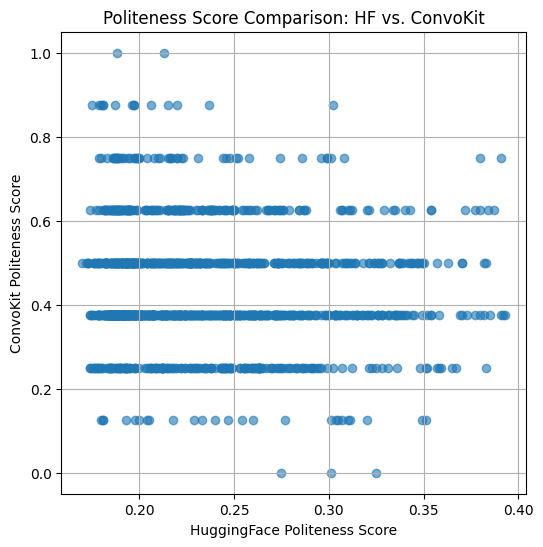

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(df["politeness_score_HF"], df["politeness_score_CK"], alpha=0.6)
plt.xlabel("HuggingFace Politeness Score")
plt.ylabel("ConvoKit Politeness Score")
plt.title("Politeness Score Comparison: HF vs. ConvoKit")
plt.grid(True)
plt.show()

In [9]:
df.head()

,prompt,reply,politeness_score_CK,politeness_score_HF
0,"Sara,\n\nPlease contact either Paul Radous or ...",Bill: Thanks for the info. I also spoke wit...,0.625,0.226
1,Hey Philip!\n\nWhat's up? I have mixed feeling...,got your message last night. What is up? Bet...,0.125,0.254
2,My thoughts for the trip:\n\nFriday:\n\nEveryo...,that sounds fine - but the zoo is in balboa pa...,0.375,0.185
3,Attached below please find the cash flow/tarif...,Attached is the latest summary (hard coded num...,0.250,0.185
4,"Sheila,\n\nSome minor differences between the ...","Vince, if there are some differences that we n...",0.500,0.276


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   prompt               1371 non-null   object 
 1   reply                1371 non-null   object 
 2   politeness_score_CK  1371 non-null   float64
 3   politeness_score_HF  1371 non-null   float64
dtypes: float64(2), object(2)
memory usage: 43.0+ KB


In [11]:
df.to_csv("email_pairs_extracted_with_politeness.csv", index=False)

In [13]:
import numpy as np

# compute the 25th and 75th percentiles
q1 = df['politeness_score_CK'].quantile(0.25)
q3 = df['politeness_score_CK'].quantile(0.75)

# filter to extremes
df = df[
    (df['politeness_score_CK'] <= q1) |
    (df['politeness_score_CK'] >= q3)
].copy()

# assign tone: bottom‐quartile = "direct", top‐quartile = "polite"
df['tone'] = np.where(
    df['politeness_score_CK'] >= df['politeness_score_CK'].median(),
    'polite',
    'direct'
)

In [19]:
!pip install --quiet rouge_score evaluate

import math
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Trainer,
    TrainingArguments,
    DataCollatorForSeq2Seq
)
from evaluate import load as load_eval_metric

# HuggingFace Dataset & split
ds = Dataset.from_pandas(df)
split = ds.train_test_split(test_size=0.1, seed=18)
train_ds, eval_ds = split["train"], split["test"]

# Tokenizer & Model
model_name     = "t5-small"
tokenizer      = T5Tokenizer.from_pretrained(model_name)
model          = T5ForConditionalGeneration.from_pretrained(model_name)

max_input_len  = 512
max_target_len = 128

# Preprocessing
def preprocess(batch):
    inputs = [
        f"[TONE={t}] {p}\n\nGenerate a {t} reply:"
        for t, p in zip(batch["tone"], batch["prompt"])
    ]
    enc = tokenizer(inputs, padding="max_length", truncation=True, max_length=max_input_len)
    lbl = tokenizer(batch["reply"], padding="max_length", truncation=True, max_length=max_target_len)
    enc["labels"] = lbl["input_ids"]
    return enc

train_tok = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
eval_tok  = eval_ds.map(preprocess,  batched=True, remove_columns=eval_ds.column_names)

# Data collator with pad masking
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, label_pad_token_id=-100)

# Trainer args
training_args = TrainingArguments(
    output_dir                   = "t5_politeness",
    per_device_train_batch_size  = 4,
    per_device_eval_batch_size   = 4,
    num_train_epochs             = 12,
    learning_rate                = 1e-5,
    logging_steps                = 50,
    save_steps                   = 200,
    save_total_limit             = 2,
    do_eval                      = True,
    report_to                    = ["none"],
    run_name                     = None,
)

trainer = Trainer(
    model            = model,
    args             = training_args,
    train_dataset    = train_tok,
    eval_dataset     = eval_tok,
    data_collator    = data_collator,
)

# Train
train_res = trainer.train()
print("Training metrics:", train_res.metrics)

# Eval
eval_res = trainer.evaluate()
loss     = eval_res["eval_loss"]
ppl      = math.exp(loss)
print(f"\nEval Loss: {loss:.3f}\nPerplexity: {ppl:.3f}")

# Generate replies
device         = trainer.args.device
gen_batch_size = 8
max_new_tokens = max_target_len

gen_texts = []
model.eval()
with torch.no_grad():
    for i in range(0, len(eval_tok["input_ids"]), gen_batch_size):
        batch_ids = torch.tensor(eval_tok["input_ids"][i:i+gen_batch_size]).to(device)
        batch_mask = torch.tensor(eval_tok["attention_mask"][i:i+gen_batch_size]).to(device)

        out_ids = model.generate(
            input_ids              = batch_ids,
            attention_mask         = batch_mask,
            max_new_tokens         = max_new_tokens,
            min_new_tokens         = 20,
            num_beams              = 5,
            no_repeat_ngram_size   = 3,
            repetition_penalty     = 2.0,
            early_stopping         = True,
            decoder_start_token_id = tokenizer.pad_token_id,
        )

        gen_texts += tokenizer.batch_decode(out_ids, skip_special_tokens=True)

        del batch_ids, batch_mask, out_ids
        torch.cuda.empty_cache()

# Get trainer predictions & compute metrics
preds = trainer.predict(eval_tok)
refs  = tokenizer.batch_decode(preds.label_ids, skip_special_tokens=True)

# filter out empty refs
pairs = [(g, r) for g, r in zip(gen_texts, refs) if r.strip()]
preds_f, refs_f = zip(*pairs) if pairs else ([], [])

rouge = load_eval_metric("rouge")
bleu  = load_eval_metric("bleu")

r_scores = rouge.compute(predictions=preds_f, references=refs_f)
b_scores = bleu.compute(predictions=preds_f, references=refs_f) if preds_f else {"bleu": 0.0}

# sample metrics and outputs
print(
    f"\nROUGE-1 F1: {r_scores['rouge1']:.3f}\n"
    f"ROUGE-2 F1: {r_scores['rouge2']:.3f}\n"
    f"ROUGE-L F1: {r_scores['rougeL']:.3f}\n"
    f"BLEU     : {b_scores['bleu']:.3f}"
)

print("\nSample generations:")
for i in range(5):
    print(f"\nExample {i+1}")
    print(" Tone     :", eval_ds[i]["tone"])
    print(" Prompt   :", eval_ds[i]["prompt"])
    print(" Reference:", refs[i])
    print(" Generated:", gen_texts[i])

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/138 [00:00<?, ? examples/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
50,12.813300
100,7.614300
150,4.355500
200,3.198800
250,2.844200
300,2.521300
350,2.226100
400,2.285600
450,2.413700
500,2.199700


Training metrics: {'train_runtime': 286.7968, 'train_samples_per_second': 51.591, 'train_steps_per_second': 12.929, 'total_flos': 2002517294579712.0, 'train_loss': 2.2700634162145654, 'epoch': 12.0}



Eval Loss: 1.695
Perplexity: 4.265



ROUGE-1 F1: 0.387
ROUGE-2 F1: 0.285
ROUGE-L F1: 0.218
BLEU     : 0.153

Sample generations:

Example 1
 Tone     : polite
 Prompt   : Wes - Are we still anticipating that Bridgeline will be allowed mark-to-market status at some point in the future?  If so, what criteria must Bridgeline meet and what is the expected timeline on it?  If this is going to happen soon, I would suggest that we avoid getting Commercial involved and developing a process to track our 40% portion of Bridgeline.
 Reference: Sorry I am so late in replying! It would seem that the MTM issue is Bridgeline's decision and would solely be based on whether or not they are, in fact, trading as defined in EITF 98-10. There are about 4 pages of criteria set forth in that document. That may be a question you want to ask Trevor Mihalik, but I do know that initially they did not meet 98-10 criteria. Their business may well have changed by now. I am confused by your suggestion about whether or not to involve commercial. I may 

In [1]:
df = pd.DataFrame({
    'generated_text': gen_texts,
    'tone': eval_ds['tone']
})
utterances = []
speakers = {}

for i, row in df.iterrows():
    speaker_id = f"user_{i}"
    speakers[speaker_id] = Speaker(id=speaker_id)
    utterances.append(Utterance(id=str(i), speaker=speakers[speaker_id], text=row["generated_text"]))

# Build ConvoKit Corpus and extract politeness strategies
corpus = Corpus(utterances=utterances)
parser = TextParser()
corpus = parser.transform(corpus)
polite = PolitenessStrategies()
corpus = polite.transform(corpus)

# Build politeness feature df
feat_df = pd.DataFrame([
    corpus.get_utterance(str(i)).meta["politeness_strategies"]
    for i in range(len(df))
]).fillna(0)

# Compute raw politeness score and normalize to [0, 1]
df["politeness_score_CK"] = (
    feat_df[positive_feats].sum(axis=1)
    - feat_df[negative_feats].sum(axis=1)
)

min_score = df["politeness_score_CK"].min()
max_score = df["politeness_score_CK"].max()
df["politeness_score_CK"] = ((df["politeness_score_CK"] - min_score) / (max_score - min_score)).round(3)

# Combine all features into the final dataframe
df = pd.concat([df, feat_df.reset_index(drop=True)], axis=1)

print("Average politeness score by tone:")
print(df.groupby("tone")["politeness_score_CK"].mean().round(3))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem

Average politeness score by tone:
tone
direct    0.424
polite    0.666
Name: politeness_score_CK, dtype: float64)


In [21]:
!pip install --quiet rouge_score evaluate

import math
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Trainer,
    TrainingArguments,
    DataCollatorForSeq2Seq
)
from evaluate import load as load_eval_metric

# HuggingFace Dataset & split
ds = Dataset.from_pandas(df)
split = ds.train_test_split(test_size=0.1, seed=18)
train_ds, eval_ds = split["train"], split["test"]

# Tokenizer & Model
model_name     = "t5-base"
tokenizer      = T5Tokenizer.from_pretrained(model_name)
model          = T5ForConditionalGeneration.from_pretrained(model_name)

max_input_len  = 512
max_target_len = 128

# Preprocessing
def preprocess(batch):
    inputs = [
        f"[TONE={t}] {p}\n\nGenerate a {t} reply:"
        for t, p in zip(batch["tone"], batch["prompt"])
    ]
    enc = tokenizer(inputs, padding="max_length", truncation=True, max_length=max_input_len)
    lbl = tokenizer(batch["reply"], padding="max_length", truncation=True, max_length=max_target_len)
    enc["labels"] = lbl["input_ids"]
    return enc

train_tok = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
eval_tok  = eval_ds.map(preprocess,  batched=True, remove_columns=eval_ds.column_names)

# Data collator with pad masking
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, label_pad_token_id=-100)

# Trainer args
training_args = TrainingArguments(
    output_dir                   = "t5_politeness",
    per_device_train_batch_size  = 4,
    per_device_eval_batch_size   = 4,
    num_train_epochs             = 12,
    learning_rate                = 1e-5,
    logging_steps                = 50,
    save_steps                   = 200,
    save_total_limit             = 2,
    do_eval                      = True,
    report_to                    = ["none"],
    run_name                     = None,
)

trainer = Trainer(
    model            = model,
    args             = training_args,
    train_dataset    = train_tok,
    eval_dataset     = eval_tok,
    data_collator    = data_collator,
)

# Train
train_res = trainer.train()
print("Training metrics:", train_res.metrics)

# Eval
eval_res = trainer.evaluate()
loss     = eval_res["eval_loss"]
ppl      = math.exp(loss)
print(f"\nEval Loss: {loss:.3f}\nPerplexity: {ppl:.3f}")

# Generate replies
device         = trainer.args.device
gen_batch_size = 8
max_new_tokens = max_target_len

gen_texts = []
model.eval()
with torch.no_grad():
    for i in range(0, len(eval_tok["input_ids"]), gen_batch_size):
        batch_ids = torch.tensor(eval_tok["input_ids"][i:i+gen_batch_size]).to(device)
        batch_mask = torch.tensor(eval_tok["attention_mask"][i:i+gen_batch_size]).to(device)

        out_ids = model.generate(
            input_ids              = batch_ids,
            attention_mask         = batch_mask,
            max_new_tokens         = max_new_tokens,
            min_new_tokens         = 20,
            num_beams              = 5,
            no_repeat_ngram_size   = 3,
            repetition_penalty     = 2.0,
            early_stopping         = True,
            decoder_start_token_id = tokenizer.pad_token_id,
        )

        gen_texts += tokenizer.batch_decode(out_ids, skip_special_tokens=True)

        del batch_ids, batch_mask, out_ids
        torch.cuda.empty_cache()

# Get trainer predictions & compute metrics
preds = trainer.predict(eval_tok)
refs  = tokenizer.batch_decode(preds.label_ids, skip_special_tokens=True)

# filter out empty refs
pairs = [(g, r) for g, r in zip(gen_texts, refs) if r.strip()]
preds_f, refs_f = zip(*pairs) if pairs else ([], [])

rouge = load_eval_metric("rouge")
bleu  = load_eval_metric("bleu")

r_scores = rouge.compute(predictions=preds_f, references=refs_f)
b_scores = bleu.compute(predictions=preds_f, references=refs_f) if preds_f else {"bleu": 0.0}

# sample metrics and outputs
print(
    f"\nROUGE-1 F1: {r_scores['rouge1']:.3f}\n"
    f"ROUGE-2 F1: {r_scores['rouge2']:.3f}\n"
    f"ROUGE-L F1: {r_scores['rougeL']:.3f}\n"
    f"BLEU     : {b_scores['bleu']:.3f}"
)

print("\nSample generations:")
for i in range(5):
    print(f"\nExample {i+1}")
    print(" Tone     :", eval_ds[i]["tone"])
    print(" Prompt   :", eval_ds[i]["prompt"])
    print(" Reference:", refs[i])
    print(" Generated:", gen_texts[i])

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/138 [00:00<?, ? examples/s]

Step,Training Loss
50,9.963200
100,5.587800
150,2.948100
200,2.176400
250,1.999200
300,1.870500
350,1.685800
400,1.779200
450,1.861500
500,1.729500


Training metrics: {'train_runtime': 859.2884, 'train_samples_per_second': 17.219, 'train_steps_per_second': 4.315, 'total_flos': 9010140948725760.0, 'train_loss': 1.804860829278232, 'epoch': 12.0}



Eval Loss: 1.450
Perplexity: 3.858

ROUGE-1 F1: 0.419
ROUGE-2 F1: 0.308
ROUGE-L F1: 0.233
BLEU     : 0.178

Sample generations:

Example 1
 Tone     : polite
 Prompt   : Wes - Are we still anticipating that Bridgeline will be allowed mark-to-market status at some point in the future?  If so, what criteria must Bridgeline meet and what is the expected timeline on it?  If this is going to happen soon, I would suggest that we avoid getting Commercial involved and developing a process to track our 40% portion of Bridgeline.
 Reference: Sorry I am so late in replying! It would seem that the MTM issue is Bridgeline's decision and would solely be based on whether or not they are, in fact, trading as defined in EITF 98-10. There are about 4 pages of criteria set forth in that document. That may be a question you want to ask Trevor Mihalik, but I do know that initially they did not meet 98-10 criteria. Their business may well have changed by now. I am confused by your suggestion about whether 

In [2]:
df = pd.DataFrame({
    'generated_text': gen_texts,
    'tone': eval_ds['tone']
})
utterances = []
speakers = {}

for i, row in df.iterrows():
    speaker_id = f"user_{i}"
    speakers[speaker_id] = Speaker(id=speaker_id)
    utterances.append(Utterance(id=str(i), speaker=speakers[speaker_id], text=row["generated_text"]))

# Build ConvoKit Corpus and extract politeness strategies
corpus = Corpus(utterances=utterances)
parser = TextParser()
corpus = parser.transform(corpus)
polite = PolitenessStrategies()
corpus = polite.transform(corpus)

# Build politeness feature df
feat_df = pd.DataFrame([
    corpus.get_utterance(str(i)).meta["politeness_strategies"]
    for i in range(len(df))
]).fillna(0)

# Compute raw politeness score and normalize to [0, 1]
df["politeness_score_CK"] = (
    feat_df[positive_feats].sum(axis=1)
    - feat_df[negative_feats].sum(axis=1)
)

min_score = df["politeness_score_CK"].min()
max_score = df["politeness_score_CK"].max()
df["politeness_score_CK"] = ((df["politeness_score_CK"] - min_score) / (max_score - min_score)).round(3)

# Combine all features into the final dataframe
df = pd.concat([df, feat_df.reset_index(drop=True)], axis=1)

print("Average politeness score by tone:")
print(df.groupby("tone")["politeness_score_CK"].mean().round(3))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem

Average politeness score by tone:
tone
direct    0.397
polite    0.683
Name: politeness_score_CK, dtype: float64)


In [23]:
!pip install --quiet rouge_score evaluate

import math
from datasets import Dataset
from transformers import (
    T5Tokenizer,
    T5ForConditionalGeneration,
    Trainer,
    TrainingArguments,
    DataCollatorForSeq2Seq
)
from evaluate import load as load_eval_metric

# HuggingFace Dataset & split
ds = Dataset.from_pandas(df)
split = ds.train_test_split(test_size=0.1, seed=18)
train_ds, eval_ds = split["train"], split["test"]

# Tokenizer & Model
model_name     = "t5-large"
tokenizer      = T5Tokenizer.from_pretrained(model_name)
model          = T5ForConditionalGeneration.from_pretrained(model_name)

max_input_len  = 512
max_target_len = 128

# Preprocessing
def preprocess(batch):
    inputs = [
        f"[TONE={t}] {p}\n\nGenerate a {t} reply:"
        for t, p in zip(batch["tone"], batch["prompt"])
    ]
    enc = tokenizer(inputs, padding="max_length", truncation=True, max_length=max_input_len)
    lbl = tokenizer(batch["reply"], padding="max_length", truncation=True, max_length=max_target_len)
    enc["labels"] = lbl["input_ids"]
    return enc

train_tok = train_ds.map(preprocess, batched=True, remove_columns=train_ds.column_names)
eval_tok  = eval_ds.map(preprocess,  batched=True, remove_columns=eval_ds.column_names)

# Data collator with pad masking
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, label_pad_token_id=-100)

# Trainer args
training_args = TrainingArguments(
    output_dir                   = "t5_politeness",
    per_device_train_batch_size  = 4,
    per_device_eval_batch_size   = 4,
    num_train_epochs             = 12,
    learning_rate                = 1e-5,
    logging_steps                = 50,
    save_steps                   = 200,
    save_total_limit             = 2,
    do_eval                      = True,
    report_to                    = ["none"],
    run_name                     = None,
)

trainer = Trainer(
    model            = model,
    args             = training_args,
    train_dataset    = train_tok,
    eval_dataset     = eval_tok,
    data_collator    = data_collator,
)

# Train
train_res = trainer.train()
print("Training metrics:", train_res.metrics)

# Eval
eval_res = trainer.evaluate()
loss     = eval_res["eval_loss"]
ppl      = math.exp(loss)
print(f"\nEval Loss: {loss:.3f}\nPerplexity: {ppl:.3f}")

# Generate replies
device         = trainer.args.device
gen_batch_size = 8
max_new_tokens = max_target_len

gen_texts = []
model.eval()
with torch.no_grad():
    for i in range(0, len(eval_tok["input_ids"]), gen_batch_size):
        batch_ids = torch.tensor(eval_tok["input_ids"][i:i+gen_batch_size]).to(device)
        batch_mask = torch.tensor(eval_tok["attention_mask"][i:i+gen_batch_size]).to(device)

        out_ids = model.generate(
            input_ids              = batch_ids,
            attention_mask         = batch_mask,
            max_new_tokens         = max_new_tokens,
            min_new_tokens         = 20,
            num_beams              = 5,
            no_repeat_ngram_size   = 3,
            repetition_penalty     = 2.0,
            early_stopping         = True,
            decoder_start_token_id = tokenizer.pad_token_id,
        )

        gen_texts += tokenizer.batch_decode(out_ids, skip_special_tokens=True)

        del batch_ids, batch_mask, out_ids
        torch.cuda.empty_cache()

# Get trainer predictions & compute metrics
preds = trainer.predict(eval_tok)
refs  = tokenizer.batch_decode(preds.label_ids, skip_special_tokens=True)

# filter out empty refs
pairs = [(g, r) for g, r in zip(gen_texts, refs) if r.strip()]
preds_f, refs_f = zip(*pairs) if pairs else ([], [])

rouge = load_eval_metric("rouge")
bleu  = load_eval_metric("bleu")

r_scores = rouge.compute(predictions=preds_f, references=refs_f)
b_scores = bleu.compute(predictions=preds_f, references=refs_f) if preds_f else {"bleu": 0.0}

# sample metrics and outputs
print(
    f"\nROUGE-1 F1: {r_scores['rouge1']:.3f}\n"
    f"ROUGE-2 F1: {r_scores['rouge2']:.3f}\n"
    f"ROUGE-L F1: {r_scores['rougeL']:.3f}\n"
    f"BLEU     : {b_scores['bleu']:.3f}"
)

print("\nSample generations:")
for i in range(5):
    print(f"\nExample {i+1}")
    print(" Tone     :", eval_ds[i]["tone"])
    print(" Prompt   :", eval_ds[i]["prompt"])
    print(" Reference:", refs[i])
    print(" Generated:", gen_texts[i])

Map:   0%|          | 0/1233 [00:00<?, ? examples/s]

Map:   0%|          | 0/138 [00:00<?, ? examples/s]

Step,Training Loss
50,9.963200
100,5.587800
150,2.948100
200,2.176400
250,1.999200
300,1.870500
350,1.685800
400,1.779200
450,1.861500
500,1.729500


Training metrics: {'train_runtime': 1296.7643, 'train_samples_per_second': 11.41, 'train_steps_per_second': 2.859, 'total_flos': 9010140948725760.0, 'train_loss': 1.804860829278232, 'epoch': 12.0}



Eval Loss: 1.450
Perplexity: 3.312

ROUGE-1 F1: 0.436
ROUGE-2 F1: 0.317
ROUGE-L F1: 0.241
BLEU     : 0.203

Sample generations:

Example 1
 Tone     : polite
 Prompt   : Wes - Are we still anticipating that Bridgeline will be allowed mark-to-market status at some point in the future?  If so, what criteria must Bridgeline meet and what is the expected timeline on it?  If this is going to happen soon, I would suggest that we avoid getting Commercial involved and developing a process to track our 40% portion of Bridgeline.
 Reference: Sorry I am so late in replying! It would seem that the MTM issue is Bridgeline's decision and would solely be based on whether or not they are, in fact, trading as defined in EITF 98-10. There are about 4 pages of criteria set forth in that document. That may be a question you want to ask Trevor Mihalik, but I do know that initially they did not meet 98-10 criteria. Their business may well have changed by now. I am confused by your suggestion about whether 

In [3]:
df = pd.DataFrame({
    'generated_text': gen_texts,
    'tone': eval_ds['tone']
})
utterances = []
speakers = {}

for i, row in df.iterrows():
    speaker_id = f"user_{i}"
    speakers[speaker_id] = Speaker(id=speaker_id)
    utterances.append(Utterance(id=str(i), speaker=speakers[speaker_id], text=row["generated_text"]))

# Build ConvoKit Corpus and extract politeness strategies
corpus = Corpus(utterances=utterances)
parser = TextParser()
corpus = parser.transform(corpus)
polite = PolitenessStrategies()
corpus = polite.transform(corpus)

# Build politeness feature df
feat_df = pd.DataFrame([
    corpus.get_utterance(str(i)).meta["politeness_strategies"]
    for i in range(len(df))
]).fillna(0)

# Compute raw politeness score and normalize to [0, 1]
df["politeness_score_CK"] = (
    feat_df[positive_feats].sum(axis=1)
    - feat_df[negative_feats].sum(axis=1)
)

min_score = df["politeness_score_CK"].min()
max_score = df["politeness_score_CK"].max()
df["politeness_score_CK"] = ((df["politeness_score_CK"] - min_score) / (max_score - min_score)).round(3)

# Combine all features into the final dataframe
df = pd.concat([df, feat_df.reset_index(drop=True)], axis=1)

print("Average politeness score by tone:")
print(df.groupby("tone")["politeness_score_CK"].mean().round(3))

No configuration file found at /root/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem

Average politeness score by tone:
tone
direct    0.327
polite    0.716
Name: politeness_score_CK, dtype: float64)
